In [1]:
import json
from os.path import isfile

statement_section_lst=[]
with open('../data/Training_data/train.json','r') as f:
    train_json=json.load(f)
    for k in train_json:
        line=train_json[k]
        premises=json.load(open('../data/Training_data/CT json/{}.json'.format(line['Primary_id'])))
        statement_section_lst.append([
            line['Statement'],
            json.dumps(premises[line['Section_id']]),
            line['Label']
        ])
        if 'Secondary_id' in line:
            premises=json.load(open('../data/Training_data/CT json/{}.json'.format(line['Secondary_id'])))
            statement_section_lst[-1][1]=json.dumps(
                json.loads(statement_section_lst[-1][1])+premises[line['Section_id']]
            )

In [2]:
len(statement_section_lst)

1700

In [3]:
import pandas as pd
import numpy as np

train_df=pd.DataFrame(statement_section_lst,columns=['statement','section','label'])
train_df['section']=train_df['section'].apply(lambda x:json.dumps([s.strip() for s in json.loads(x)]))
train_df

,statement,section,label
0,All the primary trial participants do not rece...,"[""INTERVENTION 1:"", ""Diagnostic (FLT PET)"", ""P...",Contradiction
1,"Patients with Platelet count over 100,000/mm¬¨...","[""DISEASE CHARACTERISTICS:"", ""Histologically o...",Contradiction
2,Heart-related adverse events were recorded in ...,"[""Adverse Events 1:"", ""Total: 5/32 (15.63%)"", ...",Entailment
3,Adult Patients with histologic confirmation of...,"[""Inclusion Criteria:"", ""Patients with histolo...",Contradiction
4,Laser Therapy is in each cohort of the primary...,"[""INTERVENTION 1:"", ""Laser Therapy Alone"", ""th...",Contradiction
...,...,...,...
1695,"Adequate blood, kidney, and hepatic function a...","[""Inclusion Criteria:"", ""Postmenopausal women,...",Entailment
1696,The Ridaforolimus + Dalotuzumab + Exemestane g...,"[""Outcome Measurement:"", ""1. Progression-free ...",Contradiction
1697,The only difference between the interventions ...,"[""INTERVENTION 1:"", ""Prone"", ""Prone position"",...",Entailment
1698,Patients must have a white blood cell count ab...,"[""DISEASE CHARACTERISTICS:"", ""Histologically c...",Entailment


In [4]:
import json
from os.path import isfile

statement_section_lst=[]
with open('../data/Training_data/dev.json','r') as f:
    train_json=json.load(f)
    for k in train_json:
        line=train_json[k]
        premises=json.load(open('../data/Training_data/CT json/{}.json'.format(line['Primary_id'])))
        statement_section_lst.append([
            line['Statement'],
            json.dumps(premises[line['Section_id']]),
            line['Label']
        ])
        if 'Secondary_id' in line:
            premises=json.load(open('../data/Training_data/CT json/{}.json'.format(line['Secondary_id'])))
            statement_section_lst[-1][1]=json.dumps(
                json.loads(statement_section_lst[-1][1])+premises[line['Section_id']]
            )

In [5]:
len(statement_section_lst)

200

In [6]:
import pandas as pd
import numpy as np

dev_df=pd.DataFrame(statement_section_lst,columns=['statement','section','label'])
dev_df['section']=dev_df['section'].apply(lambda x:json.dumps([s.strip() for s in json.loads(x)]))
dev_df

,statement,section,label
0,there is a 13.2% difference between the result...,"[""Outcome Measurement:"", ""Event-free Survival""...",Contradiction
1,Patients with significantly elevated ejection ...,"[""Inclusion criteria:"", ""Inclusion Criteria:"",...",Contradiction
2,a significant number of the participants in th...,"[""Adverse Events 1:"", ""Total: 20/167 (11.98%)""...",Contradiction
3,the primary trial does not report the PFS or o...,"[""Outcome Measurement:"", ""Local Control Using ...",Entailment
4,Prior treatment with fulvestrant or with a pho...,"[""Inclusion Criteria:"", ""Postmenopausal women ...",Contradiction
...,...,...,...
195,The the primary trial intervention involves on...,"[""INTERVENTION 1:"", ""Letrozole"", ""Participants...",Contradiction
196,the secondary trial reported 1 single case of ...,"[""Adverse Events 1:"", ""Total: 16/48 (33.33%)"",...",Entailment
197,the secondary trial and the primary trial do n...,"[""Outcome Measurement:"", ""Number of Patients W...",Entailment
198,the outcome measurement of the primary trial i...,"[""Outcome Measurement:"", ""Progression-free Sur...",Entailment


In [7]:
import json
from os.path import isfile

statement_section_lst=[]
with open('../data/Gold_test.json','r') as f:
    train_json=json.load(f)
    for k in train_json:
        line=train_json[k]
        premises=json.load(open('../data/Training_data/CT json/{}.json'.format(line['Primary_id'])))
        statement_section_lst.append([
            line['Statement'],
            json.dumps(premises[line['Section_id']]),
            line['Label']
        ])
        if 'Secondary_id' in line:
            premises=json.load(open('../data/Training_data/CT json/{}.json'.format(line['Secondary_id'])))
            statement_section_lst[-1][1]=json.dumps(
                json.loads(statement_section_lst[-1][1])+premises[line['Section_id']]
            )

In [8]:
len(statement_section_lst)

500

In [9]:
import pandas as pd
import numpy as np

test_df=pd.DataFrame(statement_section_lst,columns=['statement','section','label'])
test_df['section']=test_df['section'].apply(lambda x:json.dumps([s.strip() for s in json.loads(x)]))
test_df

,statement,section,label
0,Women suffering from both claustrophobia and I...,"[""Inclusion Criteria:"", ""Women are eligible to...",Contradiction
1,There are no conditions on mental mental healt...,"[""Inclusion Criteria:"", ""Women 18 years"", ""His...",Entailment
2,the secondary trial requires patients to be ov...,"[""Inclusion Criteria:"", ""Patients presenting f...",Entailment
3,Patients currently taking part in the secondar...,"[""Inclusion Criteria:"", ""Be a female of any ra...",Entailment
4,HER2 + Patients in the primary trial receive t...,"[""INTERVENTION 1:"", ""Trastuzumab"", ""Participan...",Contradiction
...,...,...,...
495,alcoholic patients are excluded from the prima...,"[""Inclusion Criteria:"", ""All participants will...",Contradiction
496,Patients with a histologically/cytologically c...,"[""Inclusion Criteria:"", ""Voluntarily signed an...",Entailment
497,the primary trial treats one of its patient co...,"[""INTERVENTION 1:"", ""Pregabalin150"", ""Patients...",Entailment
498,after a month of TAK-228 Plus Tamoxifen treatm...,"[""Outcome Measurement:"", ""Ki67 Expression"", ""K...",Contradiction


In [10]:
len(train_df),len(dev_df),len(test_df)

(1700, 200, 500)

<AxesSubplot:xlabel='label', ylabel='Count'>

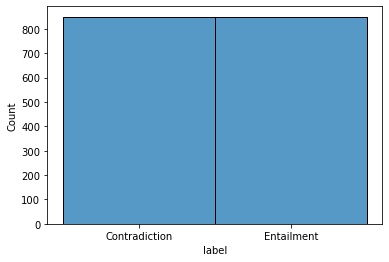

In [11]:
import seaborn as sns
sns.histplot(data=train_df, x="label")

<AxesSubplot:xlabel='label', ylabel='Count'>

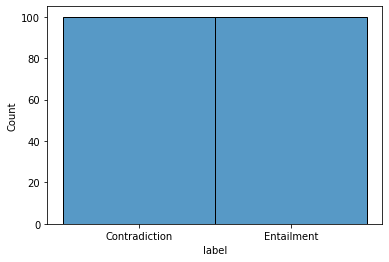

In [12]:
sns.histplot(data=dev_df, x="label")

<AxesSubplot:xlabel='label', ylabel='Count'>

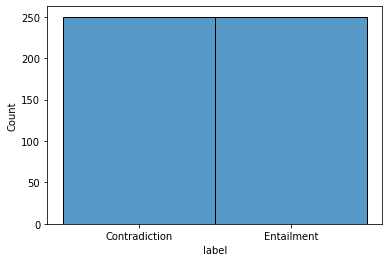

In [13]:
sns.histplot(data=test_df, x="label")

In [14]:
train_df.to_csv('./output/train_statement_section.csv',index=False)

In [15]:
dev_df.to_csv('./output/dev_statement_section.csv',index=False)

In [16]:
test_df.to_csv('./output/test_statement_section.csv',index=False)